# Sex Prediction

### Imports 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score

### Data Analysis

In [4]:
#load data
df = pd.read_csv('Data/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
#check null values
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [6]:
def unique(col):
   return df[col].nunique()

d = {}
for i in df.columns:
    value = unique(i)
    d[i] = value
print(d,sep="\n")

{'meanfreq': 3166, 'sd': 3166, 'median': 3077, 'Q25': 3103, 'Q75': 3034, 'IQR': 3073, 'skew': 3166, 'kurt': 3166, 'sp.ent': 3166, 'sfm': 3166, 'mode': 2825, 'centroid': 3166, 'meanfun': 3166, 'minfun': 913, 'maxfun': 123, 'meandom': 2999, 'mindom': 77, 'maxdom': 1054, 'dfrange': 1091, 'modindx': 3079, 'label': 2}


In [7]:
x = df.iloc[:,:-1]
y = df.label

In [8]:
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [9]:
y.head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

In [10]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [10]:
data = ['Female','Male']
d= [1584,1584]

### Pie Chart For Male and Female division

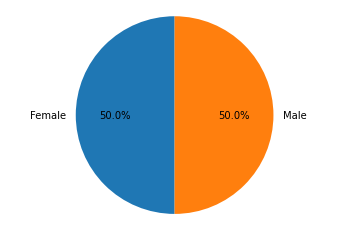

In [16]:


fig1, ax1 = plt.subplots()
fig1.set_facecolor("white")
ax1.pie(d, labels=data, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
# show plot
plt.show()

### Box plots

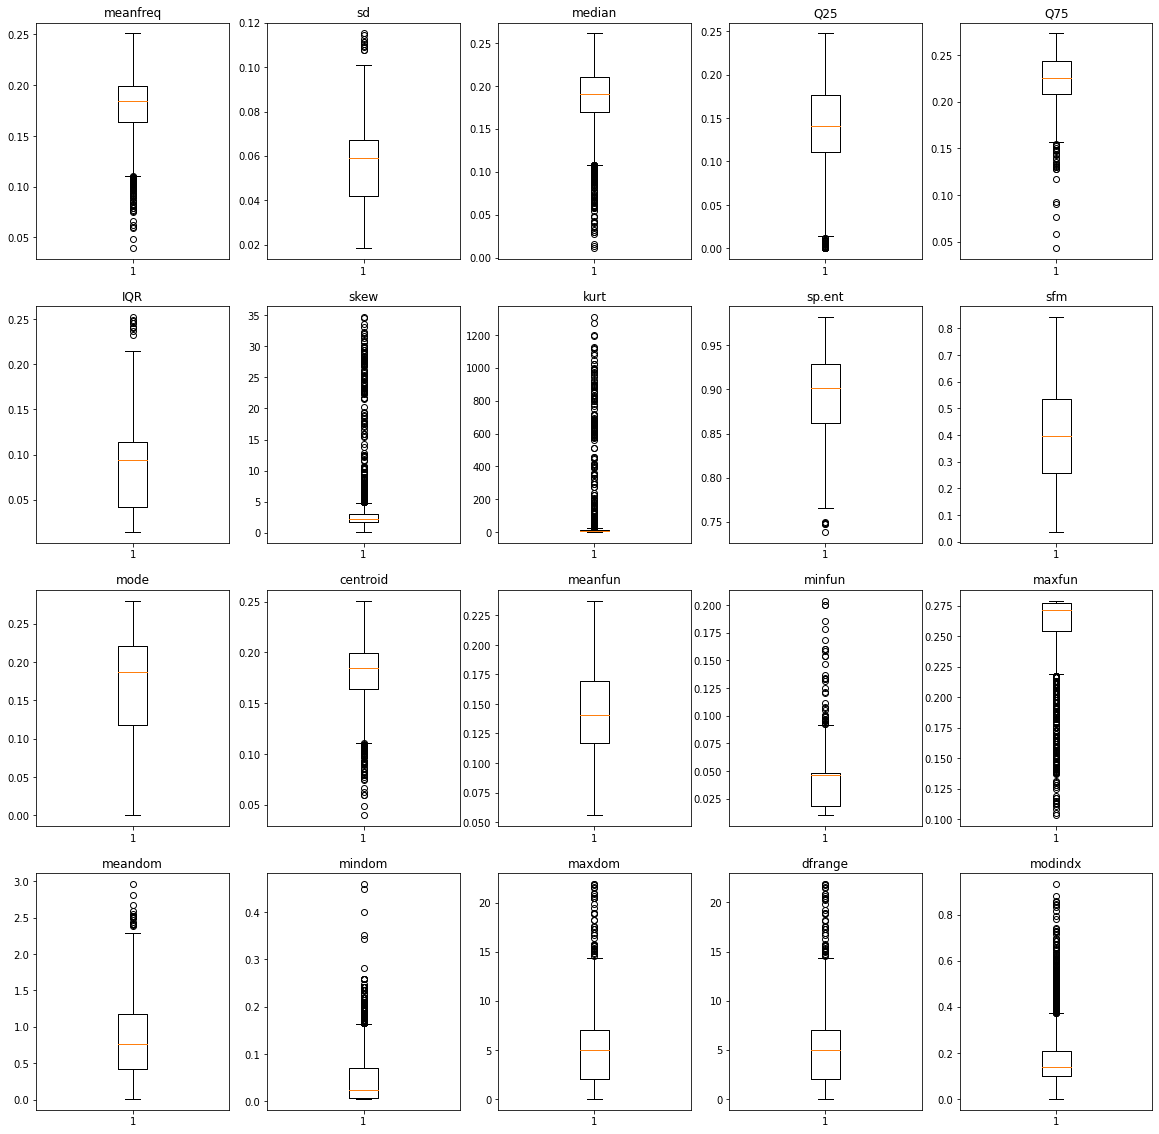

In [46]:

params = [df["meanfreq"], df["sd"], df["median"], df["Q25"], df["Q75"], df["IQR"], df["skew"], df["kurt"], df["sp.ent"], df["sfm"], df["mode"], df["centroid"], df["meanfun"], df["minfun"], df["maxfun"], df["meandom"], df["mindom"], df["maxdom"], df["dfrange"], df["modindx"]]

fig, ax = plt.subplots(4, 5,
                       figsize=(20, 20))
counter = 0
for row in range(4):
    for col in range(5):
        ax[row, col].boxplot(params[counter])
        ax[row, col].set_title(x.columns[counter])
        plt.grid()
        counter += 1



### Decision Tree Classifier

In [13]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
#split dataset into training and test with test size as 20 percent

In [17]:
DTmodel = DecisionTreeClassifier(random_state = 1)
DTmodel.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [18]:
y_pred1 = DTmodel.predict(x_test)
y_pred1 = np.array(y_pred1)

In [19]:
print(y_pred1[:10])

['female' 'female' 'female' 'male' 'female' 'female' 'female' 'male'
 'female' 'male']


In [20]:
print('score of decision tree model is: ', DTmodel.score(x_test,y_test))

score of decision tree model is:  0.9637223974763407


In [22]:
pd.crosstab(y_pred1,y_test,rownames=['matrix'],colnames=['confusion'],margins = True)

confusion,female,male,All
matrix,,,
female,300,9,309
male,14,311,325
All,314,320,634


In [24]:
print("\t\t\tDecision Tree Class report:\n",classification_report(y_pred1,y_test))

			Decision Tree Class report:
               precision    recall  f1-score   support

      female       0.96      0.96      0.96       324
        male       0.96      0.96      0.96       310

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



In [25]:
print("Decision Tree Accuracy score: ",accuracy_score(y_pred1,y_test)*100,"%")print("Decision Tree Accuracy score: ",accuracy_score(y_pred1,y_test)*100,"%")

Decision Tree Accuracy score:  96.05678233438486 %


In [26]:
###2) Random Forest 

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
RFmodel = RandomForestClassifier(random_state = 200)

In [29]:
RFmodel.fit(x_train,y_train)

RandomForestClassifier(random_state=200)

In [30]:
y_pred2 = RFmodel.predict(x_test)

In [31]:
print(y_pred2[:10])

['female' 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'female'
 'male']


In [32]:
print('score of Random forest model is: ',RFmodel.score(x_test,y_test))

score of Random forest model is:  0.9779179810725552


In [33]:
pd.crosstab(y_pred2,y_test,rownames=['matrix'],colnames=['confusion'],margins = True)

confusion,female,male,All
matrix,,,
female,319,10,329
male,4,301,305
All,323,311,634


In [34]:
print("\t\t\tRandom Forest Class report:\n",classification_report(y_pred2,y_test))

			Random Forest Class report:
               precision    recall  f1-score   support

      female       0.99      0.97      0.98       329
        male       0.97      0.99      0.98       305

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [35]:
print("Random Forest Accuracy score: ",accuracy_score(y_pred2,y_test)*100,"%")

Random Forest Accuracy score:  97.79179810725552 %


In [36]:
###3)Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
LRmodel = LogisticRegression(max_iter=10000)


In [39]:
LRmodel.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [40]:
y_pred3 = LRmodel.predict(x_test)

In [41]:
print(y_pred3[:10])

['male' 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'female'
 'male']


In [42]:
print('score of Log Reg model is: ',LRmodel.score(x_test,y_test))

score of Log Reg model is:  0.9037854889589906


In [43]:
pd.crosstab(y_pred3,y_test,rownames=['matrix'],colnames=['confusion'],margins = True)

confusion,female,male,All
matrix,,,
female,273,11,284
male,50,300,350
All,323,311,634


In [44]:
print("\t\t\tLog Reg Class report:\n",classification_report(y_pred2,y_test))

			Log Reg Class report:
               precision    recall  f1-score   support

      female       0.99      0.97      0.98       329
        male       0.97      0.99      0.98       305

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [45]:
print("Log Reg Accuracy score: ",accuracy_score(y_pred3,y_test)*100,"%")

Log Reg Accuracy score:  90.37854889589906 %


In [46]:
###4) KNN Classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier
KNmodel = KNeighborsClassifier(n_neighbors =15, metric = 'minkowski', p = 1)
KNmodel.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15, p=1)

In [48]:
y_pred4 = KNmodel.predict(x_test)

In [49]:
y_pred4[:10]

array(['male', 'female', 'female', 'male', 'male', 'female', 'female',
       'male', 'male', 'male'], dtype=object)

In [50]:
print('score of KNN model is: ', KNmodel.score(x_test,y_test))

score of KNN model is:  0.7839116719242902


In [51]:
pd.crosstab(y_pred4,y_test,rownames=['matrix'],colnames=['confusion'],margins = True)

confusion,female,male,All
matrix,,,
female,241,55,296
male,82,256,338
All,323,311,634


In [52]:
print("\t\t\tKNN report:\n",classification_report(y_pred4,y_test))

			KNN report:
               precision    recall  f1-score   support

      female       0.75      0.81      0.78       296
        male       0.82      0.76      0.79       338

    accuracy                           0.78       634
   macro avg       0.78      0.79      0.78       634
weighted avg       0.79      0.78      0.78       634



In [53]:
print("KNN Accuracy score: ",accuracy_score(y_pred4,y_test)*100,"%")

KNN Accuracy score:  78.39116719242902 %


In [54]:
###5) SVM Model

In [55]:
from sklearn.svm import SVC

In [56]:
SVMmodel = SVC(kernel = 'linear')

In [57]:
SVMmodel.fit(x_train,y_train)

SVC(kernel='linear')

In [58]:
y_pred5 = SVMmodel.predict(x_test)

In [59]:
y_pred5[:10]

array(['male', 'male', 'female', 'female', 'male', 'male', 'female',
       'male', 'female', 'male'], dtype=object)

In [60]:
print('score of SVM model is: ', SVMmodel.score(x_test,y_test))

score of SVM model is:  0.919558359621451


In [61]:
print(pd.crosstab(y_pred5,y_test,rownames=['matrix'],colnames=['confusion'],margins = True))

confusion  female  male  All
matrix                      
female        282    10  292
male           41   301  342
All           323   311  634


In [62]:
print("\t\t\tSVM report:\n",classification_report(y_pred5,y_test))

			SVM report:
               precision    recall  f1-score   support

      female       0.87      0.97      0.92       292
        male       0.97      0.88      0.92       342

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634



In [63]:
print("SVM Accuracy score: ",accuracy_score(y_pred5,y_test)*100,"%")

SVM Accuracy score:  91.9558359621451 %


In [64]:
list1 = [y_pred1,y_pred2,y_pred3,y_pred4,y_pred5]
d =['DecTree','RandomForest','Log Regression','KNN','SuppVecMachine']
a={} 
k=0
list2 = []
for i in list1:
    list2.append(accuracy_score(i,y_test)*100)
for i in d:
    a[i] = list2[k]
    k+=1

In [65]:
print("List of all model accuracies:\n",a)

List of all model accuracies:
 {'DecTree': 96.05678233438486, 'RandomForest': 97.79179810725552, 'Log Regression': 90.37854889589906, 'KNN': 78.39116719242902, 'SuppVecMachine': 91.9558359621451}


In [66]:
print("the most accurate model is:", max(a, key=a.get))

the most accurate model is: RandomForest


In [67]:
#Mini Project by Shabareesh Aryan